# Convolutional Neural Networks and Deep Learning for Pneumonia Detection in Chest X-rays

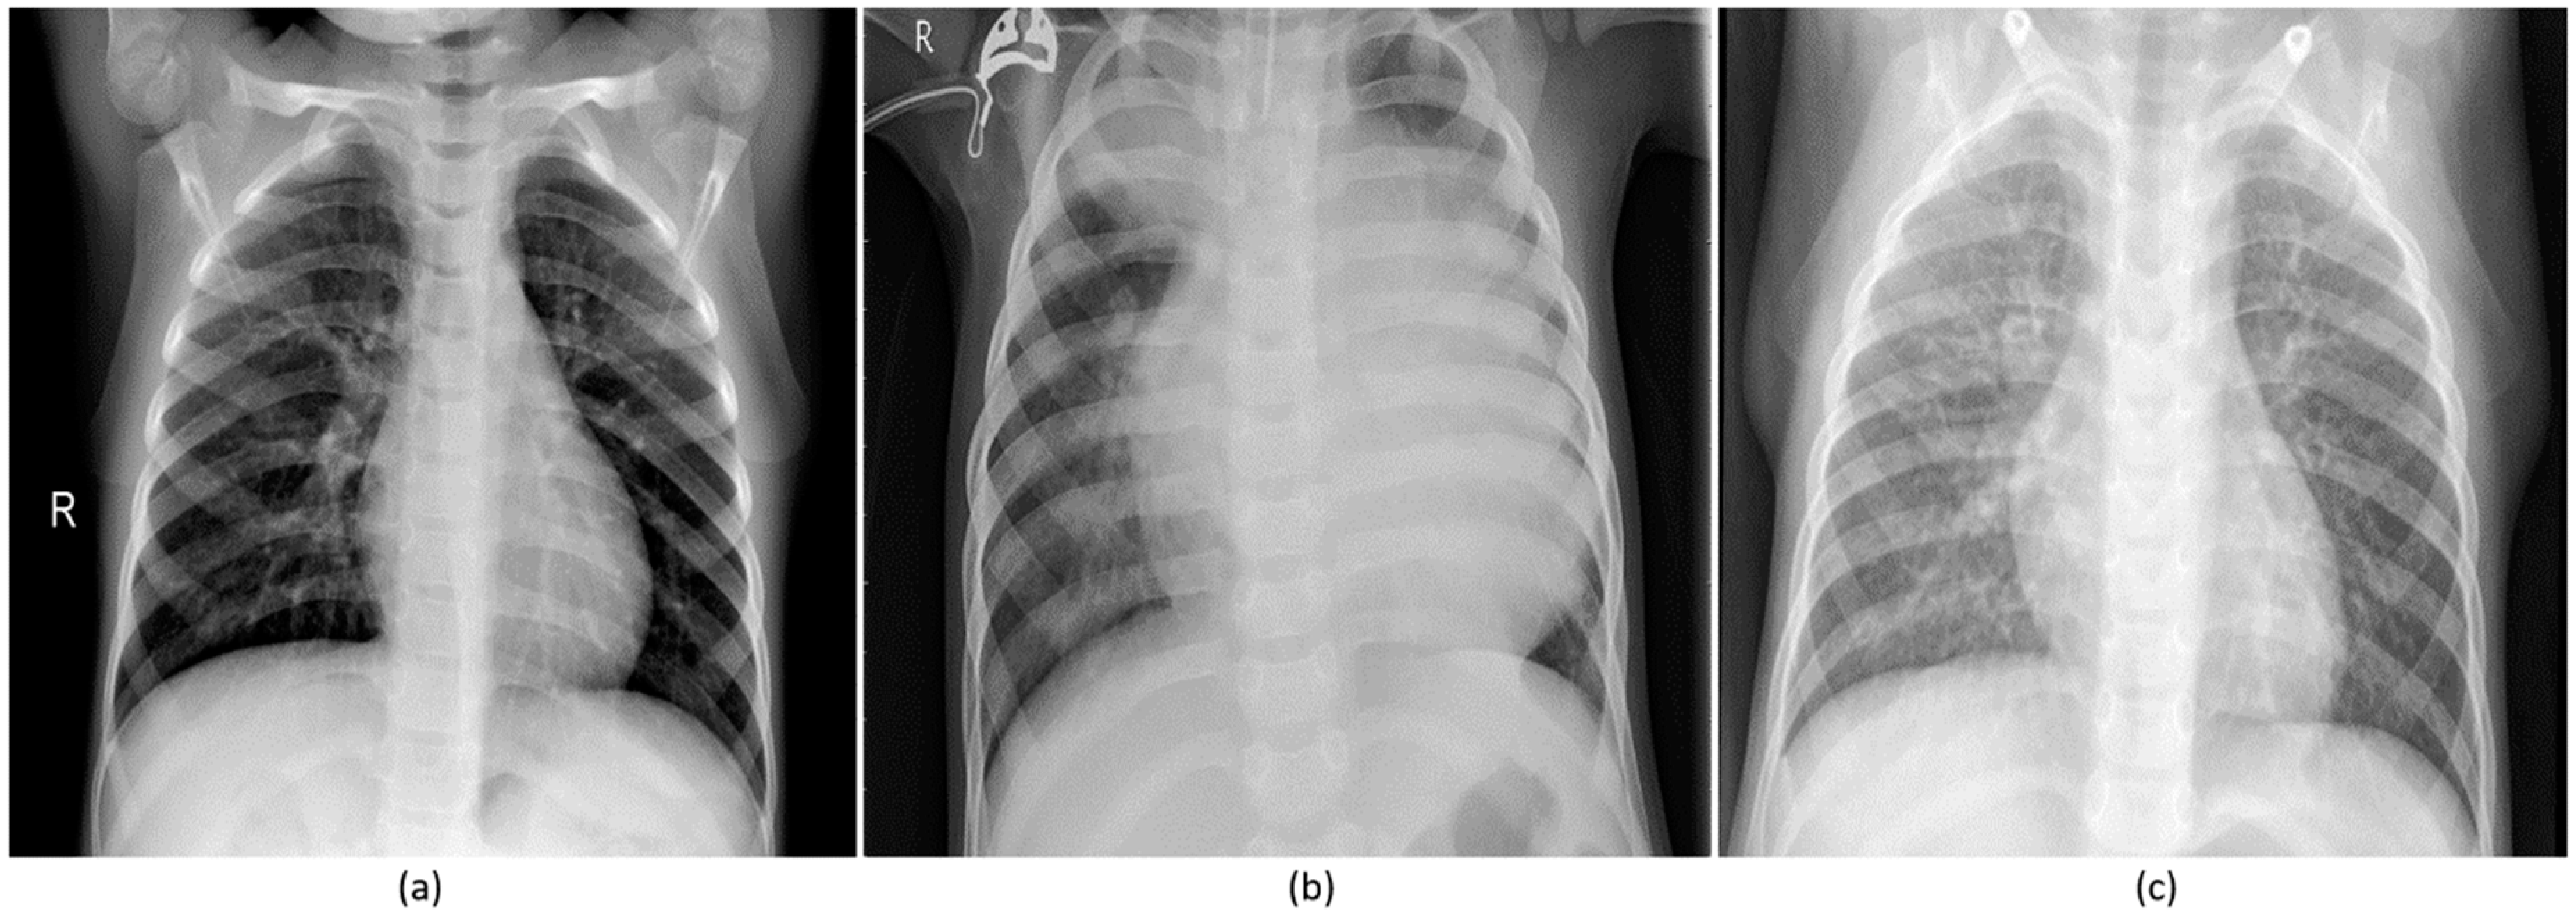

## Overview: 

In an attempt to combat pneumonia deaths in developing countries, we created a model that is able to determine with 91% accuracy and 89% recall, whether or not a chest x-ray presents pneumonia or not. 

## Business Problem 

According to the Mayo Health Clinic, “Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.”

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

The United Nations International Children's Emergency Fund(UNICEF)) and Save the Children joint task force came to us and presented their concerns relating to Pneumonia deaths in Children, particularly in poor and developing countries. 

Pneumonia is a disease of poverty. 99% of child deaths from pneumonia occur in developing countries. Within these high burden countries, it is the poorest and most marginalized children who are at greatest risk. Pneumonia kills more children than any other infectious disease, claiming the lives of over 800,000 children under five every year, or around 2,200 every day

Not only is there too little access to healthcare providers in these regions, things like travel distance, accessibility, and cost are all barriers for people getting to healthcare, but when they arrive, the offices and hospitals are understaffed and overworked. 

***"An estimated 18 million more health workers are needed by 2030 to prevent, diagnose and treat pneumonia..."(UNICEF)*** 

Lastly, and this is where we hope to make the most impact, there are **too many undiagnosed or misdiagnosed Pneumonia patients. This is due to several of the previously mentioned reasons: Lack of access to healthcare, shortage of healthcare workers, and because doctors are short on time and can’t give their scans their due diligence.** 

We are here because we believe a child should not die because of where she was born or what resources her family has.

## Data Understanding 

Our data was taken from a publication in "Cell" Journal called, "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning" by Daniel S. Kermany et al. It consisted of chest x-ray scans of children under the age of 5 at the Guangzhou Women and Children’s Medical Center.

In total, there were 1,584 NON-Pneumonia scans and 4,274 Pneumonia Positive scans.

Our model included data generation for image augmentation, which allowed us to train our final model with 121,272 images.

## Methodology and Results

### Logistic Regression
After EDA and data augmentation, the first model we ran was a baseline logistic regression. Although far from ideal, we were surprised at how accurate it was, 74%. Though, it had a very poor recall score, 32%. 


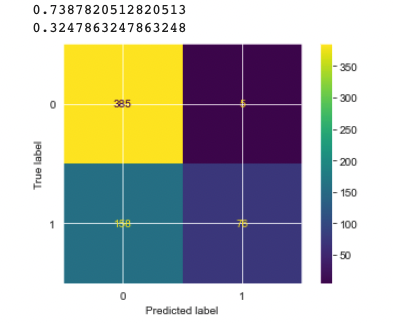

### Baseline Model -CNN
Our baseline deep learning model, a convolutional neural network, actually scored worse than our logistic regression.

Baseline Model Characteristics:

model.add(layers.Dense(20, activation='relu', input_shape=(22500,)))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer='sgd'
loss = 'binary_crossentropy'
epochs = 50
batch_size = 32

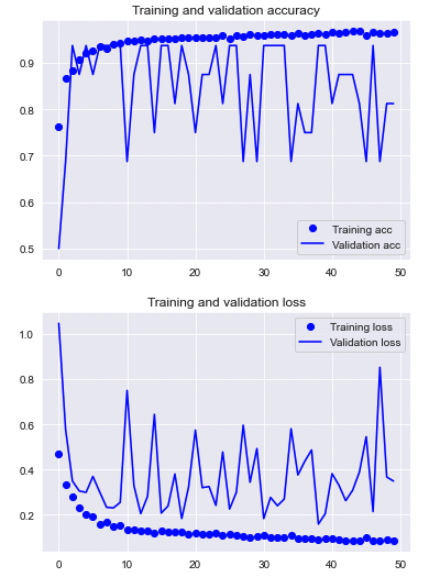

Our baseline model scored with 72% accuracy and 28% recall. 

### Model 2 - Conv2d and MaxPool2d

Model Characteristics:

model.add(layers.Conv2D(32 , (3,3), strides = 1, activation='relu', input_shape=(150,150,1)))
model.add(layers.MaxPool2D((2,2), strides = 2))

model.add(layers.Conv2D(64, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))


model.add(layers.Conv2D(64, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))


model.add(layers.Conv2D(128, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))

model.add(layers.Conv2D(256, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

optimizer='sgd'
loss = 'binary_crossentropy'
epochs = 20
steps_per_epoch= 80
batch_size = 32            


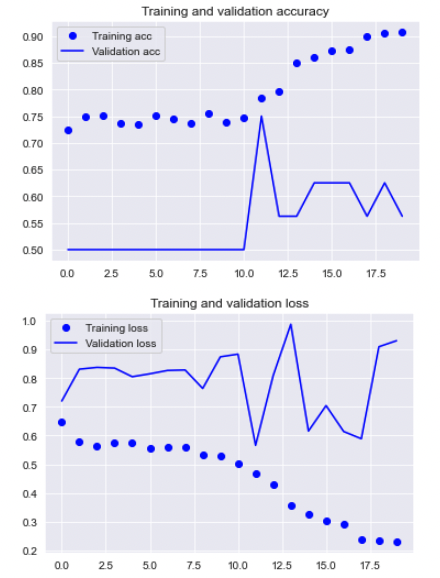

Our second model was a slight improvement in both accuracy and recall, 75% accuracy score, 39% recall score.

### Model 3  - rmsprop, batch normalization, padding 
For our next model, we decided to change the optomizer to root mean squared propogation and add batch normalization and padding. 

Model 3 scored better, but was obviously overfit. 

### Final Model
After noticing very obvious overfitting in model 3, we added dropout and learning rate reduction(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001) 
 
 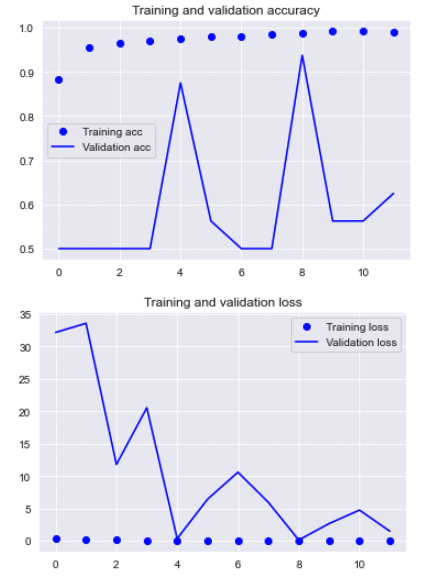

This final model scored with very high accuracy, 91%, as well as high recall, 89%. 


## Conclusions/Next Steps

We were very happy with our final model, scoring 91% accuracy and 86% recall. 

Considering our business problem, aside from accuracy, we decided that recall would be the next most important metric to optimize our model for. This is because a a high recall score = low false negative rate. A false negative for a diagnostic tool in health care may be the worst case scenario, as this leaves a potentially unhealthy, susceptible, possibly contagious person beleieving they are healthy and don't need treatment. A recall score of 86% means that out of the 9% who were not correctly diagnosed, only 14% are false negatives. In other words, only 14% of the incorrectly labeled scans were labeled as NON-Pneumonia, but actually contained pneumonia. So approx. 1/100 scans will receive a false negative detection. Which, since our model is only supposed to be used to supplement doctors, is valuable. 

We believe that our model should be used as a "first check" system for chest x-ray scans, labeling each scan as either "pneumonia likely" or "pneumonia unlikely".  This helps attack our business problem from multiple angles. 
1. Improves accessibility.  

- If no doctor is accessible, even a nurse or general healthcare worker can utilize our model as a preliminary assessment of a scan. This could inform their reccomended next steps - to see a doctor, seek treatment, or other.

2. Saves doctor's and healthcare worker's time, relieving the over burdened heathcare system. 

- Having previously sorted the scans, a doctor can know which scans can be briefly glanced-at to confirm, and which ones should be more thoroughly reviewed. 

3. Decreases misdiagnosed and undiagnosed patients. 

- We believe that our prelimary scan may catch pneumonia that would otherwise be overlooked by a doctor. Further, a discrepancy between our model's prediction, and the doctor's assessment, could warrant an additional expert opinion. 


In future studies and models, we beleieve that we can modfiy the model to classify the pneumonia positive scans as either viral or bacterial pneumonia. 